# **Enhancing Public Safety - Implementing YOLOv8 for Real-time Weapon Detection (Celurit)**

- Name : Toni Andreas Susanto
- City : Samarinda, Kalimantan Timur


### Environment Preparation

Sebelum dapat menggunakan algoritma YOLO untuk object detection, kita perlu melakukan instalasi library `ultralytics` terlebih dahulu. Kita akan melakukan instalasi library  melalui command `!pip install`.

In [1]:
!python --version

Python 3.10.13


In [3]:
from ultralytics import YOLO

### A. Data Collection and Preparation <a id="4" ></a>

YOLOv8 membutuhkan kumpulan gambar yang telah dilabeli dengan bounding box untuk melakukan pelatihan model object detection. Kita akan memanfaatkan sebuah tools bernama **Roboflow** untuk membantu kita mempersiapkan dataset. Roboflow adalah platform yang menyederhanakan proses pembuatan dataset dan model computer vision.

🌐 Website Roboflow : https://roboflow.com/


**Weapon Detection Dataset**

Format dataset yang dapat diterima oleh YOLOv8 memiliki struktur data seperti berikut ini:

```
weapon.zip
├── 📁 training
|   ├── 📁 images
|   |   ├── 🖼️ image1.jpg
|   |   ├── 🖼️ image2.jpg
|   |   └── ...
|   └── 📁 labels
|       ├── 📝 image1.txt
|       ├── 📝 image2.txt
|       └── ...
├── 📁 validation
|   ├── 📁 images
|   |   ├── 🖼️ image3.jpg
|   |   ├── 🖼️ image4.jpg
|   |   └── ...
|   └── 📁 labels
|       ├── 📝 image3.txt
|       ├── 📝 image4.txt
|       └── ...
└── 📝 data.yaml
```

dimana :

- File `image.jpg` merupakan gambar yang akan dipelajari oleh model
- File `image.txt` merupakan teks berisi koordinat bounding box dan label object pada gambar dengan nama yang sama
- File `data.yaml` merupakan sebuah file yang menyimpan lokasi directory dari folder training dan validation, serta menyimpan nama-nama kelas yang tersimpan.

In [4]:
import os 

train_path = "/kaggle/input/sajam-yolov8/train/images"
train_list = os.listdir(train_path)
print("Training Images: ", len(train_list))

val_path = "/kaggle/input/sajam-yolov8/valid/images"
val_list = os.listdir(val_path)
print("Validation Images: ", len(val_list))

test_path = "/kaggle/input/sajam-yolov8/test/images"
test_list = os.listdir(test_path)
print("Testing Images: ", len(test_list))

Training Images:  630
Validation Images:  179
Testing Images:  91


### B. Training Model <a id="5" ></a>

**YOLOv8 Model Preparation**

YOLOv8 menyediakan berbagai varian **model pre-trained** dengan ukuran dan kapabilitas yang berbeda-beda, disesuaikan dengan kebutuhan penggunaan yang spesifik, mulai dari aplikasi yang memerlukan kecepatan tinggi dengan pengorbanan sedikit akurasi, hingga aplikasi yang memerlukan akurasi tinggi tanpa memperdulikan beban komputasi yang lebih besar. **Model pre-trained** adalah model yang telah dilatih untuk mempelajari data dengan jumlah yang sangat besar. 

Berikut perbandingan pilihan input model YOLOv8 yang tersedia:

| Model      | mAP  | Speed - CPU (ms) | Speed - GPU (ms) | 
|------------|------|------------------|------------------|
| YOLOv8n.pt | 37.3 | 80.4             | 0.99             | 
| YOLOv8s.pt | 44.9 | 128.4            | 1.20             | 
| YOLOv8m.pt | 50.2 | 234.7            | 1.83             | 
| YOLOv8l.pt | 52.9 | 375.2            | 2.39             |
| YOLOv8x.pt | 53.9 | 479.1            | 3.53             |

📝 **Note**: `.pt` adalah file extension dari **PyTorch**, sebuah library dengan spesialisasi dalam machine learning yang dapat digunakan untuk membuat dan menyimpan suatu model.


**Model Training**

Setelah semua proses persiapan data selesai, selanjutnya kita akan melaksanakan proses training untuk melatih model kita agar dapat mengidentifikasi objek-objek yang merupakan senjata `knife` atau `handgun`. 

Pertama-tama, kita akan menginisialisasi pembuatan model menggunakan `YOLOv8m.pt`. Alasan kita menggunakan `YOLOv8m.pt` adalah untuk melakukan proses **Transfer Learning**, dimana kita "men-transfer" ilmu yang sudah dipelajari YOLO pada dataset berjumlah sangat besar untuk mempelajari data baru yang akan kita berikan. Berikut keunggulan menggunakan proses transfer learning:

1. Penghematan waktu dan sumber daya
2. Kemudahan untuk mempelajari dataset dengan jumlah kecil
3. Peningkatan akurasi yang signifikan

In [5]:
model_weapon = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 214MB/s] 


In [6]:
import os 
os.environ['WANDB_DISABLED'] = 'true'

In [7]:
# Proses training model
results = model_weapon.train(data = "/kaggle/input/sajam-yolov8/data.yaml",
                             epochs=50,
                             imgsz=640) # Ukuran gambar ketika training

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.152 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/sajam-yolov8/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, 

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 72.9MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅
train: Scanning /kaggle/input/sajam-yolov8/train/labels... 630 images, 6 backgrounds, 0 corrupt: 100%|██████████| 630/630 [00:03<00:00, 166.63it/s]
train: WARNING ⚠️ Cache directory /kaggle/input/sajam-yolov8/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 736. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/input/sajam-yolov8/valid/labels... 179 images, 1 backgrounds, 0 corrupt: 100%|██████████| 179/179 [00:01<00:00,

### C. Evaluation and Performance Analysis of Object Detection Models <a id="6" ></a>

In [8]:
import pandas as pd

evaluation = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
evaluation

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,1.59050,2.74880,1.8436,0.00372,0.37531,0.00196,0.00067,3.15,inf,6.5958,0.000542,0.000542,0.000542
1,1,1.77450,2.69090,1.9688,0.00715,0.27162,0.00668,0.00164,3.1077,inf,8.871,0.001076,0.001076,0.001076
2,2,1.91860,2.61910,2.0605,0.00045,0.01911,0.00021,0.00008,nan,nan,nan,0.001588,0.001588,0.001588
3,3,1.94340,2.51630,2.0745,0.01264,0.07519,0.00641,0.00175,3.0295,40.626,4.1715,0.001568,0.001568,0.001568
4,4,1.80930,2.43770,1.9906,0.05738,0.17969,0.02628,0.00644,2.9729,5.8241,3.6968,0.001568,0.001568,0.001568
5,5,1.84570,2.42720,2.0101,0.33098,0.14536,0.11717,0.04723,2.4746,9.3149,3.2051,0.001535,0.001535,0.001535
6,6,1.82630,2.39510,1.9921,0.28624,0.21805,0.10991,0.03952,2.8329,5.2059,3.4839,0.001502,0.001502,0.001502
7,7,1.75390,2.27190,1.9420,0.34758,0.12720,0.16575,0.06308,2.1115,3.7683,2.7415,0.001469,0.001469,0.001469
8,8,1.73550,2.21980,1.8848,0.01814,0.50188,0.01643,0.00594,2.2567,76.471,2.8673,0.001436,0.001436,0.001436
9,9,1.68360,2.15030,1.8555,0.25188,0.42794,0.28032,0.11397,1.9301,3.2294,2.4589,0.001403,0.001403,0.001403


> Dataframe tersebut menunjukkan perkembangan performa model kita dari epoch pertama hingga terakhir. Meskipun terdapat banyak nilai, kita hanya akan fokus pada nilai `metrics/precision(B)`, `metrics/recall(B)`, dan `metrics/mAP50(B)`.

#### Precision

**Precision** adalah nilai yang merepresentasikan performa model untuk mengidentifikasi apakah prediksinya merupakan objek relevan atau hanya background. Nilai Precision dapat diperoleh dengan menghitung rasio **True Positive (TP)** terhadap seluruh **prediksi objek** yang dilambangkan dengan:

$$Precision = \frac{TP}{TP+FP}$$


#### Recall

**Recall** adalah nilai yang merepresentasikan performa model untuk mengidentifikasi ground truth/objek yang ingin dideteksi. Nilai Recall dapat diperoleh dengan menghitung rasio **True Positive (TP)** terhadap seluruh **ground truth** yang dilambangkan dengan:

$$Recall = \frac{TP}{TP+FN}$$


📝**Note**:

Perbedaan utama Precision dan Recall adalah Precision dipengaruhi oleh nilai **False Positive (FP)** yang terjadi karena salah memprediksi **background**, sedangkan Recall dipengaruhi oleh nilai **False Negative (FN)** yang disebabkan karena salah memprediksi **ground truth**


### Mean Average Precision (mAP)

**Mean Average Precision (mAP)** adalah nilai yang menggabungkan kedua aspek penting dari deteksi objek: seberapa akurat model dalam mendeteksi objek relevan (**precision**) dan seberapa baik model dalam menemukan semua objek yang seharusnya (**recall**). Metrik ini sangat populer untuk digunakan sebagai standar utama evaluasi performa model object detection.

Untuk menghitung nilai mAP, kita perlu menghitung rata-rata nilai precision pada setiap nilai recall yang mungkin, dari 0 hingga 1. Untuk mengubah nilai recall, dapat dilakukan dengan memodifikasi batas threshold confidence score yang ditetapkan agar prediksi dapat terjadi (secara default, nilainya 0.25). Nilai tersebut dapat direpresentasikan oleh **kurva Precision-Curve** seperti contoh dibawah ini:

![Mean Average Precision (mAP)](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*GC4nLLTDq1eOP9njT6_INA.jpeg)

Setelah berhasil menghitung **Average Precision (AP)**, kita dapat memperoleh nilai mAP dengan merata-ratakan nilai AP untuk seluruh kelas yang kita gunakan untuk dievaluasi.



Model Weapon Epochs Terakhir: 
- Precision = 0.60728
- Recall = 0.61660
- mAP = 

**Dalam Konteks Weapon Detection**

Precision rendah -> Model banyak memprediksi background
- objek yang dicari salah
- akan sering informasi yang salah tentang keberadaan senjata
- banyak object dideteksi padahal bukan weapon.

Recall rendah -> Model banyak misi ground truth
- Banyak senjata yang tidak dikenali
- Gambar senjata yang kepotong kemungkinan gak kedeteksi
- Tindah kejahatan tidak terdeteksi (Perampokan tidak terhentikan)
- Gagal mendeteksi senjata, padahal aslinya ada. 

### D. Perform Object Detection on a Video <a id="7" ></a>

Object detection dapat digunakan untuk mengidentifikasi senjata yang digunakan seseorang untuk melakukan tindak kekerasan yang terekam CCTV. Ketika seseorang terdeteksi menggunakan senjata, maka salah satu hal yang dapat dilakukan adalah dengan mengaktifkan alarm untuk menotifikasi pihak keamanan. Pihak keamanan juga dapat dikirimkan informasi berupa waktu deteksi, lokasi kejadian, dan bahkan snapshot atau klip video singkat dari tindakan kekerasan tersebut.

#### Menyiapkan model terbaik yang telah dibuat.

In [9]:
model_robbery = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [37]:
result_robbery = model_robbery.predict(source = "/kaggle/input/bawa-celurit/Bawa Celurit.mp4",
                                       stream = True,
                                       save = True,
                                       conf = 0.5)

for result in result_robbery:
    print("Weapon Detected = {} \n".format(len(result.boxes)))
    
    if len(result.boxes) > 0:
       print("WEAPON DETECTED!")
    
       # Menyalakan alarm untuk menotifikasi pihak keamanan 
       # activate_alarm()
       print("Alarm Activated \n")


video 1/1 (1/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 26.0ms
video 1/1 (2/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.1ms
video 1/1 (3/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.0ms
video 1/1 (4/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 24.8ms
video 1/1 (5/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 24.6ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (6/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 24.5ms
video 1/1 (7/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 24.5ms
video 1/1 (8/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 24.5ms
video 1/1 (9/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.3ms
video 1/1 (10/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.4ms
video 1/1 (11/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (12/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.4ms
video 1/1 (13/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.3ms
video 1/1 (14/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.4ms
video 1/1 (15/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.1ms
video 1/1 (16/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.0ms
video 1/1 (17/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.1ms
video 1/1 (18/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.6ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (19/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.6ms
video 1/1 (20/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.6ms
video 1/1 (21/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.3ms
video 1/1 (22/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.9ms
video 1/1 (23/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.9ms
video 1/1 (24/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.9ms
video 1/1 (25/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.7ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (26/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.7ms
video 1/1 (27/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.6ms
video 1/1 (28/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (29/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (30/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (31/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (32/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (33/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.0ms
video 1/1 (34/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (35/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (36/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (37/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (38/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (39/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (40/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (41/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (42/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (43/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (44/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (45/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (46/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (47/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (48/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (49/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (50/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (51/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (52/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (53/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (54/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (55/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (56/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (57/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (58/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (59/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (60/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (61/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (62/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (63/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (64/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (65/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (66/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (67/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (68/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (69/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (70/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (71/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (72/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (73/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (74/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (75/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (76/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (77/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (78/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (79/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (80/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (81/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (82/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (83/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (84/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (85/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (86/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (87/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (88/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (89/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (90/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (91/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (92/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (93/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (94/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (95/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (96/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (97/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (98/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (99/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (100/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.3ms
video 1/1 (101/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (102/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (103/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (104/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (105/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (106/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (107/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (108/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (109/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (110/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (111/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (112/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (113/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (114/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (115/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (116/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (117/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (118/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (119/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (120/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (121/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (122/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (123/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (124/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (125/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.1ms
video 1/1 (126/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (127/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (128/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (129/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (130/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (131/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (132/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.0ms
video 1/1 (133/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms
video 1/1 (134/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (135/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (136/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (137/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (138/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (139/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (140/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (141/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (142/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (143/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (144/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (145/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (146/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (147/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (148/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (149/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (150/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (151/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (152/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (153/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (154/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (155/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (156/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (157/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (158/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (159/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (160/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (161/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (162/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (163/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (164/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (165/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (166/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (167/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (168/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 



video 1/1 (169/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.2ms
video 1/1 (170/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.1ms
video 1/1 (171/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.2ms
video 1/1 (172/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.1ms
video 1/1 (173/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (174/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (175/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (176/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (177/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (178/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (179/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (180/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (181/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (182/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (183/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (184/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (185/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (186/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (187/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (188/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (189/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (190/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (191/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (192/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (193/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (194/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (195/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.2ms
video 1/1 (196/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.3ms
video 1/1 (197/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (198/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (199/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (200/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (201/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (202/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (203/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (204/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (205/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (206/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (207/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (208/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (209/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (210/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (211/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (212/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (213/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (214/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.1ms
video 1/1 (215/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 



video 1/1 (216/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (217/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (218/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (219/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (220/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.3ms
video 1/1 (221/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.4ms
video 1/1 (222/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 



video 1/1 (223/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (224/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (225/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (226/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (227/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (228/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (229/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (230/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (231/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (232/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (233/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (234/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (235/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (236/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (237/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (238/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (239/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (240/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (241/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (242/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (243/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (244/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (245/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (246/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (247/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (248/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (249/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (250/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (251/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (252/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (253/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (254/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (255/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (256/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (257/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (258/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (259/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (260/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (261/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (262/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (263/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (264/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (265/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (266/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (267/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (268/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (269/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (270/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (271/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (272/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (273/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (274/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (275/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (276/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (277/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (278/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (279/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (280/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (281/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (282/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (283/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (284/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (285/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (286/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (287/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (288/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (289/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (290/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (291/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (292/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (293/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (294/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (295/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (296/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (297/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (298/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (299/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (300/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (301/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (302/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (303/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (304/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.0ms
video 1/1 (305/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (306/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (307/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (308/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (309/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.2ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 



video 1/1 (310/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (311/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (312/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (313/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (314/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.0ms
video 1/1 (315/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (316/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (317/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (318/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (319/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (320/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.2ms
video 1/1 (321/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.1ms
video 1/1 (322/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.2ms
video 1/1 (323/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (324/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (325/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.0ms
video 1/1 (326/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.3ms
video 1/1 (327/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (328/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (329/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (330/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (331/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (332/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (333/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (334/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (335/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (336/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (337/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (338/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (339/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (340/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (341/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (342/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (343/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (344/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (345/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (346/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (347/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (348/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (349/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (350/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (351/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (352/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.1ms
video 1/1 (353/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (354/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 1 

WEAPON DETECTED!
Alarm Activated 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (355/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (356/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (357/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (358/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (359/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (360/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (361/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (362/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (363/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (364/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (365/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (366/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (367/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (368/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (369/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (370/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (371/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (372/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (373/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (374/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (375/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (376/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (377/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (378/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (379/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (380/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (381/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (382/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (383/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (384/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (385/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (386/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (387/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (388/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (389/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (390/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (391/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (392/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (393/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (394/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (395/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (396/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (397/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (398/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (399/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (400/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (401/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (402/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



video 1/1 (403/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (404/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (405/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (406/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (407/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (408/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 

Weapon Detected = 0 



In [38]:
result_robbery = model_robbery.predict(source = "/kaggle/input/bawa-celurit/Bawa Celurit.mp4",
                                       stream = True,
                                       save = True,
                                       conf = 0.5)


# dimunculkan di set ke frame tertentu
frame_list = []

for frame in result_robbery:
    frame_list.append(frame)
    print("Jumlah Senjata Terdeteksi: ", len(frame.boxes)) # Menghitung jumlah bounding box


video 1/1 (1/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.2ms
video 1/1 (2/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.1ms
video 1/1 (3/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.1ms
video 1/1 (4/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.0ms
video 1/1 (5/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.1ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (6/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 25.0ms
video 1/1 (7/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.6ms
video 1/1 (8/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.6ms
video 1/1 (9/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.6ms
video 1/1 (10/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.6ms
video 1/1 (11/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.7ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (12/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 17.7ms
video 1/1 (13/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.1ms
video 1/1 (14/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.1ms
video 1/1 (15/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.0ms
video 1/1 (16/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.8ms
video 1/1 (17/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.8ms
video 1/1 (18/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.8ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (19/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.5ms
video 1/1 (20/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.5ms
video 1/1 (21/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.5ms
video 1/1 (22/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.1ms
video 1/1 (23/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.1ms
video 1/1 (24/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.1ms
video 1/1 (25/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (26/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 14.4ms
video 1/1 (27/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.3ms
video 1/1 (28/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.1ms
video 1/1 (29/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms
video 1/1 (30/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms
video 1/1 (31/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms
video 1/1 (32/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (33/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.1ms
video 1/1 (34/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms
video 1/1 (35/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms
video 1/1 (36/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.0ms
video 1/1 (37/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.9ms
video 1/1 (38/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.6ms
video 1/1 (39/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.6ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (40/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.6ms
video 1/1 (41/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.5ms
video 1/1 (42/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.5ms
video 1/1 (43/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.5ms
video 1/1 (44/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.2ms
video 1/1 (45/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.2ms
video 1/1 (46/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.2ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (47/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (48/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (49/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (50/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.1ms
video 1/1 (51/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (52/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (53/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (54/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (55/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (56/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (57/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (58/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (59/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (60/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (61/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (62/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (63/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (64/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (65/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (66/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (67/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (68/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (69/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (70/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (71/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (72/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (73/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (74/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (75/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (76/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (77/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (78/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (79/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (80/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (81/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (82/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (83/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (84/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (85/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (86/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (87/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (88/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (89/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (90/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (91/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (92/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (93/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (94/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (95/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (96/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (97/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (98/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (99/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (100/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.2ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  1


video 1/1 (101/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (102/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (103/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (104/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (105/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (106/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (107/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (108/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (109/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (110/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (111/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (112/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (113/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (114/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (115/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (116/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (117/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (118/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (119/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (120/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (121/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi: 

video 1/1 (122/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.0ms
video 1/1 (123/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (124/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (125/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (126/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (127/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (128/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


 0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (129/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (130/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (131/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (132/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (133/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (134/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (135/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (136/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (137/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (138/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (139/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (140/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (141/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (142/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (143/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (144/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (145/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (146/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms
video 1/1 (147/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (148/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (149/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.1ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (150/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (151/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (152/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (153/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.2ms
video 1/1 (154/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (155/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (156/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (157/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (158/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (159/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (160/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (161/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (162/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (163/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (164/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (165/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (166/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (167/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (168/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (169/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (170/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms


Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1


video 1/1 (171/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (172/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (173/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (174/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (175/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (176/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (177/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (178/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (179/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (180/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (181/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (182/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (183/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (184/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (185/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (186/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (187/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (188/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (189/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (190/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (191/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (192/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (193/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (194/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (195/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.6ms
video 1/1 (196/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.4ms
video 1/1 (197/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (198/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (199/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (200/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (201/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (202/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (203/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (204/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (205/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (206/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (207/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (208/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (209/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (210/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (211/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (212/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (213/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (214/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (215/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (216/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (217/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (218/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (219/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (220/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.3ms
video 1/1 (221/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.5ms
video 1/1 (222/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.4ms
video 1/1 (223/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (224/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (225/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (226/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (227/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (228/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (229/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (230/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (231/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (232/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (233/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (234/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (235/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (236/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (237/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (238/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (239/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (240/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (241/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (242/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (243/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (244/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (245/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (246/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (247/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (248/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (249/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (250/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (251/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (252/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (253/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (254/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (255/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (256/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (257/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (258/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (259/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (260/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (261/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (262/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (263/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (264/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (265/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (266/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (267/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (268/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (269/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (270/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (271/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (272/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (273/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (274/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (275/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (276/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (277/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (278/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (279/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (280/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (281/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (282/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (283/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (284/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (285/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (286/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (287/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (288/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (289/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (290/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (291/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (292/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (293/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (294/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (295/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (296/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (297/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (298/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (299/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (300/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (301/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (302/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (303/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (304/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (305/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (306/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.3ms
video 1/1 (307/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (308/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (309/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.3ms
video 1/1 (310/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0


video 1/1 (311/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (312/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (313/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (314/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (315/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (316/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (317/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (318/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (319/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (320/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.6ms
video 1/1 (321/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.6ms
video 1/1 (322/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.6ms
video 1/1 (323/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (324/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (325/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.8ms
video 1/1 (326/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.8ms
video 1/1 (327/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (328/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (329/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (330/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (331/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms


Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  1
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (332/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (333/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (334/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (335/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (336/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.0ms
video 1/1 (337/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.0ms
video 1/1 (338/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.0ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (339/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (340/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (341/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (342/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (343/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (344/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (345/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (346/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (347/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (348/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (349/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (350/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.8ms
video 1/1 (351/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (352/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 1 celurit, 11.8ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  1


video 1/1 (353/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (354/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (355/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.7ms
video 1/1 (356/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (357/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (358/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (359/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (360/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 21.9ms
video 1/1 (361/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (362/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (363/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (364/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (365/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (366/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (367/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (368/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (369/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (370/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (371/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (372/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (373/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (374/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (375/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (376/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (377/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (378/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (379/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (380/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (381/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (382/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (383/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (384/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (385/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (386/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms
video 1/1 (387/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.4ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (388/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (389/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (390/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (391/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (392/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (393/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (394/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (395/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (396/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (397/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (398/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (399/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.6ms
video 1/1 (400/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (401/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


video 1/1 (402/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (403/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (404/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.9ms
video 1/1 (405/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 13.5ms
video 1/1 (406/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 12.0ms
video 1/1 (407/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms
video 1/1 (408/408) /kaggle/input/bawa-celurit/Bawa Celurit.mp4: 384x640 (no detections), 11.5ms


Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0
Jumlah Senjata Terdeteksi:  0


Speed: 1.6ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


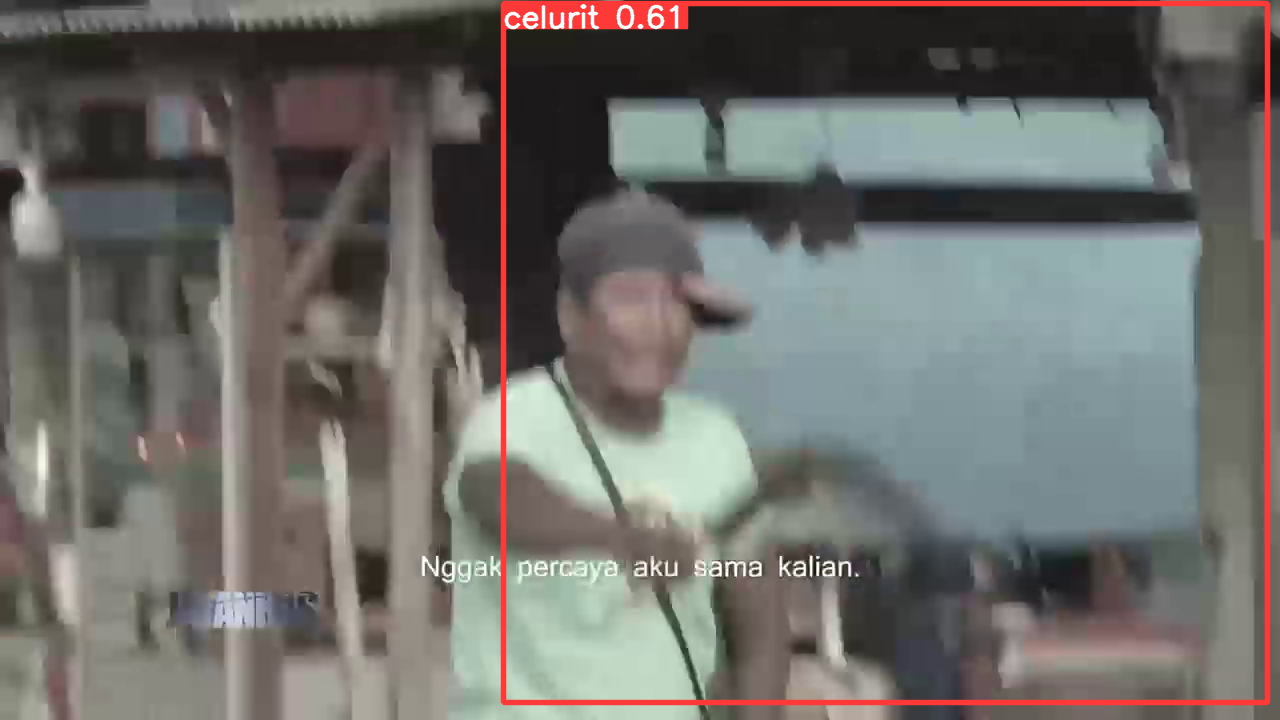

In [56]:
from PIL import Image
import cv2

# Menampilkan gambar hasil prediksi dari frame terakhir video 
Image.fromarray(cv2.cvtColor(frame_list[195].plot(), cv2.COLOR_BGR2RGB))